In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r"C:\Users\tarak\OneDrive\Documents\V S CODE\MACHINE LEARNING\Linear Regression\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

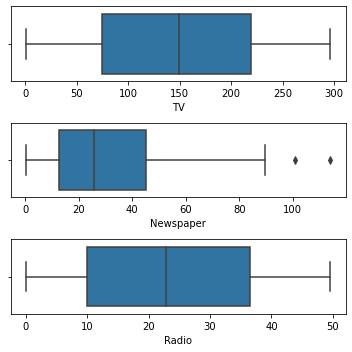

In [11]:
#For Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

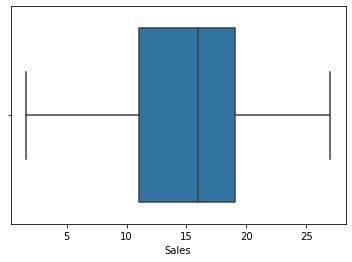

In [12]:
#Univariate Analysis for a Target Variable
sns.boxplot(df['Sales'])
plt.show()

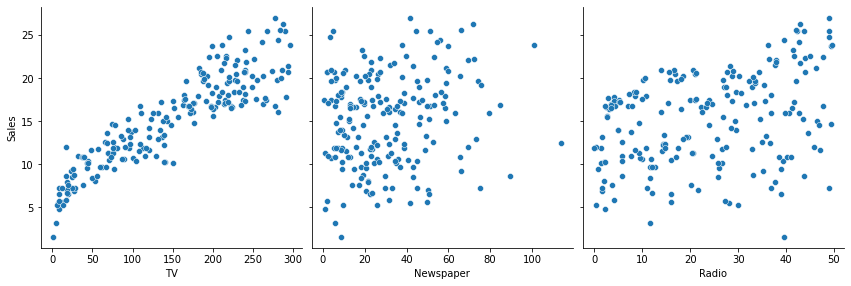

In [13]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

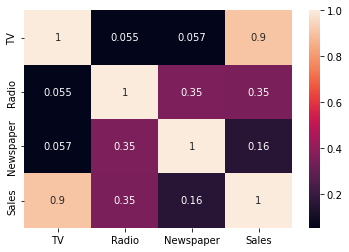

In [14]:
# TV and Sales have high Correlation i.e Linearly dependent
sns.heatmap(df.corr(), annot = True)
plt.show()

In [15]:
X =df['TV']
y = df['Sales']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [17]:
X_train.shape,X_test.shape

((160,), (40,))

In [18]:
y_train.shape,y_test.shape

((160,), (40,))

In [19]:
import statsmodels.api as sm

In [20]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    7.007108
TV       0.055483
dtype: float64

In [22]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.71e-59
Time:                        12:12:03   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

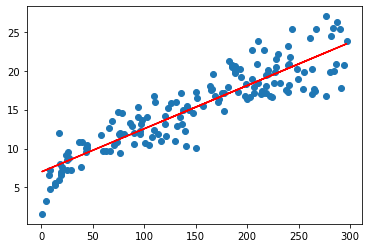

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.007108 + 0.055483*X_train, 'r')
plt.show()

In [24]:
y_train_pred = lr.predict(X_train_sm)
residual_error = (y_train - y_train_pred)

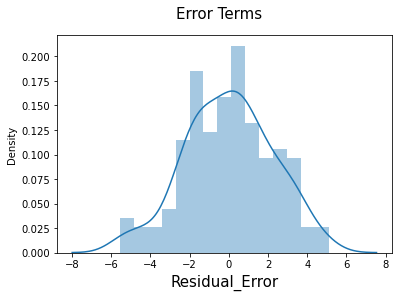

In [25]:
fig = plt.figure()
sns.distplot(residual_error, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)          # Plot heading 
plt.xlabel('Residual_Error', fontsize = 15)         # X-label
plt.show()

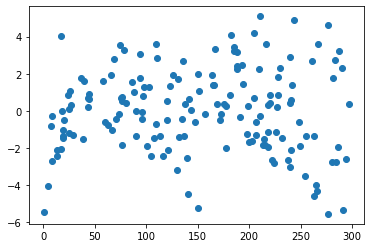

In [26]:
#Looking for Error patterns i.e No AutoCorrelation
plt.scatter(X_train,residual_error)
plt.show()

In [27]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [28]:
y_pred.head()

95     16.067473
15     17.848476
30     23.258063
158     7.656259
128    19.230001
dtype: float64

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.470035001123256

In [31]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8025613034236981

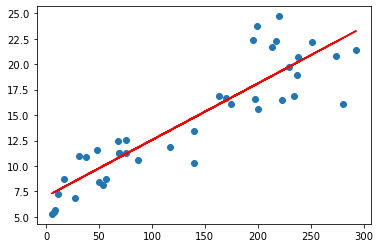

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test,  7.007108 + 0.055483*X_test, 'r')
plt.show()